<a href="https://colab.research.google.com/github/ParalelaUnsaac/G4-2020-1/blob/main/Ordenamiento_OpenMPGColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Algoritmos de ordenamiento en OPENMP</h1> 📚📓

#**Datos generales acerca del proyecto**



**Institución:** Universidad Nacional de San Antonio Abad del Cusco

**Facultad:** Facultad de Ingenieria Electrica, Electronica, Informatica y Mecanica

**Escuela Profesional:** Ingenieria Informatica y de Sistemas

**Docente:**👩‍🏫
Quintanilla Portugal Roxana Lisette 

**Trabajo:**📂

    Fase 1:Documentacion y entendimiento de del problema a tratar en este caso algoritmos de ordenamiento secuenciales y paralelos.

    Fase 2:Utilizacion del lenguaje de programacion c++

    Fase 3:Implementacion del codigo en lenguaje de programacion c dentro de Google Colaboratory

**Integrantes:** 📌

- Huancara Ccolqque Alex Helder
- Huillca Herrera Victor Pool
- Inca Cruz Carlos Eduardo
- Quispe Palomino Luiyi Antony 
- Sipaucar Condori Maritza
- Tintaya Taco Yurema Lisbeth
- Ugarte Castillo Briggitte Leonor

#**Desarrollo del programa**


##¿Por que OPENMP?
Luego de investigar las distintas opciones disponibles para el procesamiento en paralelo estudiadas en el curso, (se investigó CUDA, OpenMP y MPI), se decidió utilizar OpenMP por su amplia compatibilidad y la cantidad de aportes en línea. Se trabajo en Google Colaboraty
ya que pose soporte para OpenMP, incluyendo su librería correspondiente:
```#include <omp.h>```
##¿Como configurar OPENMP en Google Colab?
Primero usamos la siguiente plantilla y escribimos nuestro programa en c dentro de la cadena de caracteres **code**
```
code = """
//librerias necesarias
//Modulos Necesarios
// modulo principal
int main() {
    //Tu codigo
    return 1;
}
"""
#Creamos un archivo code.c e introducimos los caracteres incluidos en la variable code
text_file = open("code.c", "w")
text_file.write(code)
text_file.close()

#introducimos el numero maximo de hilos disponibles
%env OMP_NUM_THREADS=20
#introducimos las variables de ejecucion y generamos un exe llamado NombrePrograma con las intrucciones de openmp
!gcc -o NombrePrograma -fopenmp code.c
 #invocamos al programa ejecutable
!./NombrePrograma
```
Sin embargo, el compilador no comenzará a trabajar con multithreading hasta que no se habilite 

```
%env OMP_NUM_THREADS=80
```
dentro de las variables de entorno.
El programa comienza cargando un arreglo desordenado, utilizando las funciones para la generación de números pseudo-aleatorios de la librería stdlib, inicializando siempre la generación de la semilla con la función:
```
srand(2);
```
para que todas las ejecuciones posean el mismo arreglo, para lograr un informe lo más objetivo posible. Para setear la cantidad de threads deseados, se utilizó la función provista por OpenMP, que recibe por parámetro la cantidad a crear:
```
%env OMP_NUM_THREADS=80
```


# **Contenido de este notebook**

Este notebook contiene 4 secciones, en los cuales se expone detalladamente a los distintos algoritmos de ordenamiento; una vez seleccionada; el programa ejecutará primero un ordenamiento lineal, y luego en paralelo; indicando los tiempos de cada uno. Para llevar a cabo dicho objetivo, se utilizó la librería time, donde al comienzo de cada ordenamiento se declaró dos variables de tipo double la primera es start y la segunda end:
```
start = omp_get_wtime();
/*Codigo secuencial o paralelo
end = omp_get_wtime();
```

y al finalizar dicho ordenamiento, se obtuvo la diferencia, para luego mostrarla por pantalla tanto en ticks del reloj como en segundos, la funcion printf propia del lenguaje de programacion c:
```
printf("Tiempo de ejecucion %f seconds\\n", end - start);
```

Luego de cada set de ordenamientos, es posible ver determinada posición del arreglo, para corroborar que el mismo fue correctamente realizado. Esto fue corroborado en todos los casos, mostrando el arreglo, por mas larga que sea la cadena mostrara todos los resultados de la cadena





##Diagrama de componentes


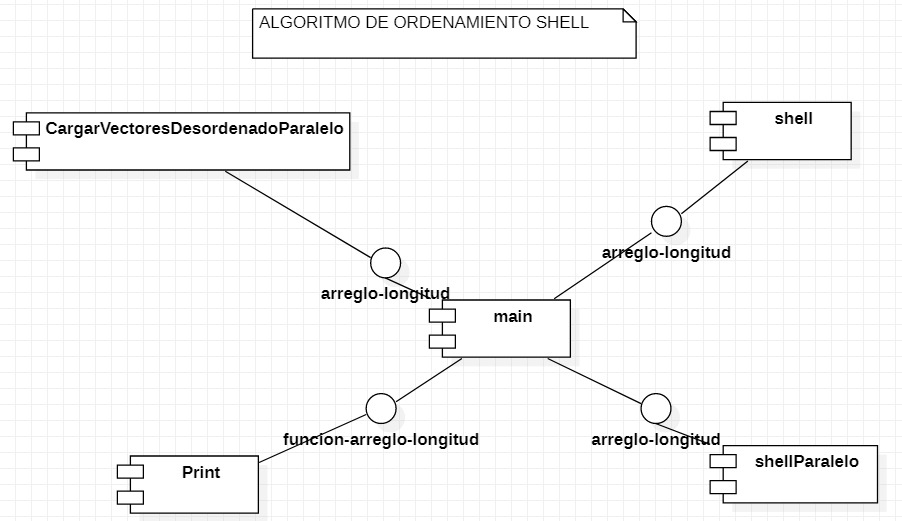
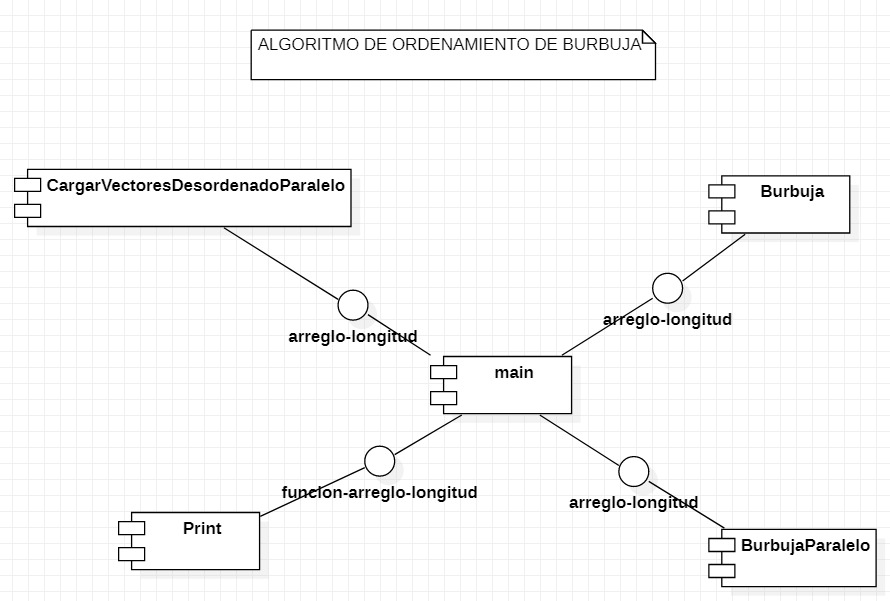
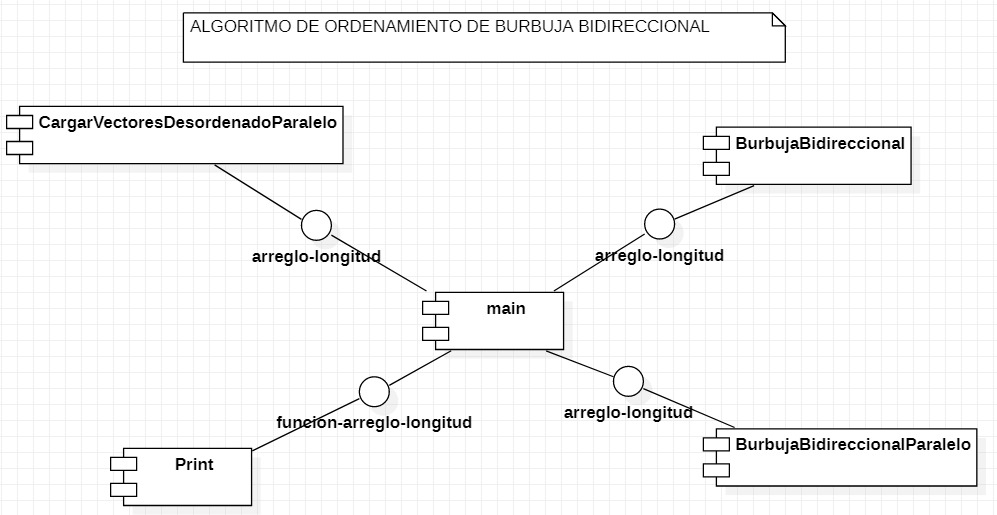
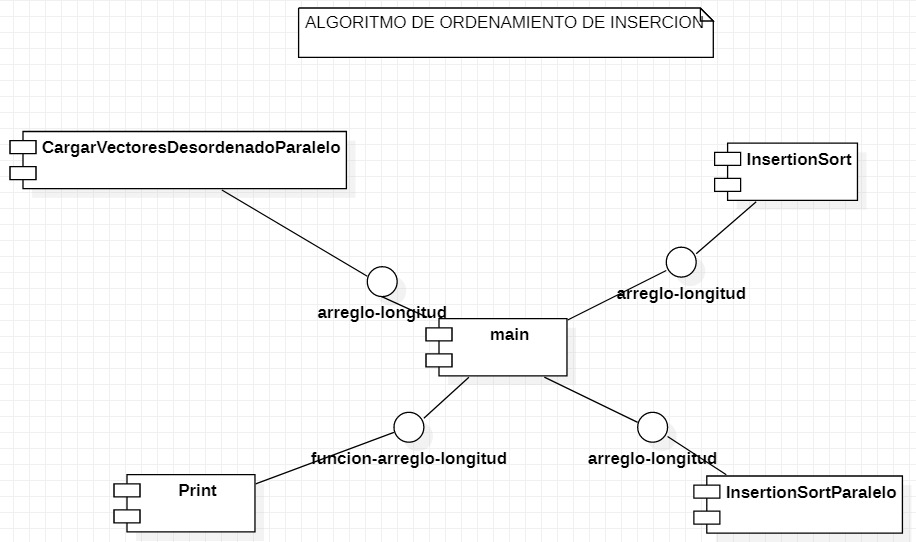


In [ ]:
#Algoritmo de ordenamiento basico
code = """
#include <stdio.h>
#include <stdlib.h>

int comp (const void * elem1, const void * elem2) 
{
    int f = *((int*)elem1);
    int s = *((int*)elem2);
    if (f > s) return  1;
    if (f < s) return -1;
    return 0;
}
int main(int argc, char* argv[]) 
{
    int x[] = {4,5,2,3,1,0,9,8,6,7};

    qsort (x, sizeof(x)/sizeof(*x), sizeof(*x), comp);

    for (int i = 0 ; i < 10 ; i++)
        printf ("%d ", x[i]);

    return 0;
}
"""

text_file = open("code.c", "w")
text_file.write(code)
text_file.close()
%env OMP_NUM_THREADS=6
!gcc -o sumaarreglosenparalelo -fopenmp code.c

!./sumaarreglosenparalelo


env: OMP_NUM_THREADS=6
0 1 2 3 4 5 6 7 8 9 

#**Libreria OpenMP para arquitecturas de memoria compartida**



En diversas aplicaciones practicas cada vez es mas frecuente la presencia de problemas
de optimizacion que involucran variables que deben tomar valores discretos. Debido a
su naturaleza combinatoria, los problemas de optimizacion discretos presentan por lo
general una complejidad computacional exponencial, y por tanto son mucho mas complicados de resolver que los problemas continuos.En la siguiente figura muestra la estructura de un programa secuencial

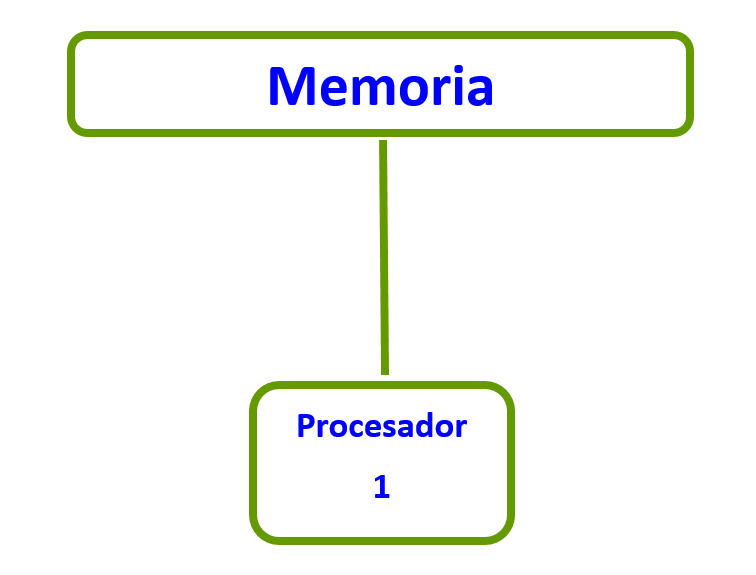

En contraparte el paradigma de memoria compartida es completamente distinto al de memoria distribuida. La idea basica se centra en ejecutar en una serie de hilos o threads, las tareas
concurrentes que expresa el algoritmo paralelo, dentro del mismo espacio de memoria.
El algoritmo paralelo debe controlar el acceso de lectura y escritura a la zona de variables compartidas para evitar los problemas que originan las condiciones de carrera
y las dependencias de los datos, evitando, por tanto, incorrecciones en la ejecucion.

OpenMP es una interfaz de programación de aplicaciones (API) para la programación multiproceso
de memoria compartida en múltiples plataformas. Permite añadir concurrencia a los programas
escritos en C, C++ y Fortran sobre la base del modelo de ejecución fork-join. Está disponible en
muchas arquitecturas, incluidas las plataformas de Unix y de Microsoft Windows. Se compone de
un conjunto de directivas de compilador, rutinas de biblioteca, y variables de entorno que influyen
el comportamiento en tiempo de ejecución.
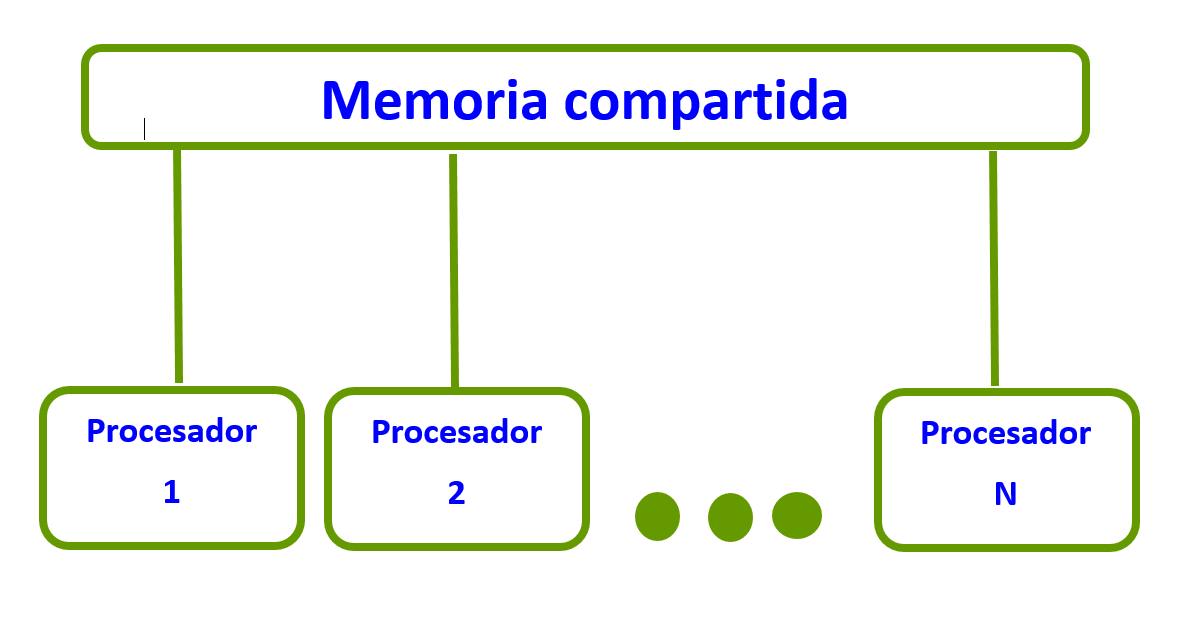


*imagen:* http://yisusff.blogspot.com/2011/04/ensayo.html


Definido conjuntamente por proveedores de hardware y de software, OpenMP es un modelo de
programación portable y escalable que proporciona a los programadores una interfaz simple y
flexible para el desarrollo de aplicaciones paralelas, para plataformas que van desde las
computadoras de escritorio hasta supercomputadoras. Una aplicación construida con un modelo
de programación paralela híbrido se puede ejecutar en un clúster de computadoras utilizando
OpenMP y MPI, o a través de las extensiones de OpenMP para los sistemas de memoria
distribuida, como se muestra en la ilustración

https://riunet.upv.es/bitstream/handle/10251/7108/tesisUPV3099.pdf

<h1>Directivas</h1>


*   **parallel**: Esta directiva nos indica que la parte de código que la comprende puede ser ejecutada por varios hilos. Se crea una tarea implícita para cada hilo perteneciente al equipo de hilos creado por el parallel

*   **for**: El equipo de hilos que se encuentra con el for ejecuta una o más fracciones de iteraciones como resultado de dividir el bucle delimitado por la directiva entre los hilos del equipo (el tamaño de cada partición dependerá de las cláusulas opcionales añadidas al for). Su formato es:
```
#pragma omp parallel for [cláusula, ... , cláusula]
```
. Cada fracción de iteraciones es una tarea implícita (el programador no ha particionado el bucle manualmente y anotado una tarea por cada trozo).

<h1>Cláusulas de visibilidad de datos</h1>
*   **shared**(valor-i_1, ..., valor-i_N): Los datos de la región paralela son compartidos, lo que significa que son visibles y accesibles por todos los hilos. Por definición, todas las variables que trabajan en la región paralela son compartidas excepto el contador de iteraciones.
*   **private**(valor-i_1, ..., valor-i_N): Los datos de la región paralela nombrados por private son copiados al área de almacenamiento local del hilo (principalmente su pila), lo que significa que cada hilo los usará como variable temporal. Una variable privada no es inicializada y tampoco se mantiene fuera de la región paralela. Por definición, el contador de iteraciones en OpenMP es privado.

*   **default**: Permite al programador que todas las variables de la región paralela sean shared o no para C/C++, o shared, firstprivate, private, o none para Fortran. La opción none fuerza al programador a declarar de que tipo será cada variable en la región paralela.
Las siguientes cláusulas definen operaciones colectivas:

*   **reduction**(tipo:valor-i_1, ..., valor-i_N): Cada hilo privatiza las variables listadas y al finalizar la sección de la directiva en la que aparece la cláusula, los distintos hilos actualizan la variable global de la que deriva la copia privada realizando la operación indicada por la clásulua reduction. Esto evita condiciones de carrera. El tipo puede ser: +, -, *, /, min, max ó definido por el usuario.

# **Algoritmos de ordenamiento**


<h1>Importancia</h1>

Los algoritmos de ordenamiento han sido fuente de gran interés e investigación desde el inicio de la computación, aunque su resolución es relativamente simple a lo largo de la historia se ha diseñado numerosas técnicas para lograr el algoritmo más eficiente que logre ordenar una lista de la manera más rápida y eficiente.

La gran variedad y cantidad de algoritmos de ordenamiento diferentes los hace un buen tema para el aprendizaje de cualquier lenguaje de programación. Para programar uno de estos algoritmos es necesario aplicar conceptos de arreglos, operaciones de comparación y operaciones aritméticas.
Notaciones usadas

*   Array: Espacios de memoria donde se almacenan los numeros
*   n: Cantidad de elementos

<h1>Complejidad computacional</h1>
La complejidad computacional es el mejor, promedio y peor comportamiento que tiene un determinado algoritmo dependiendo del tamaño de la lista. La cantidad de pasos a realizar dependerá en muchos casos del nivel de desorden inicial de la lista, por lo que son necesarios estos tres valores para comparar el rendimiento de los diferentes algoritmos.

Para describir la complejidad computacional de un algoritmo de ordenamiento para una lista de tamaño n se utiliza la notación O() que indica la cantidad de operaciones necesarias para finalizar el algoritmo correctamente. Por ejemplo O(n) significa que el algoritmo necesita tantos pasos como elementos en la lista para finalizar.

<h1>Uso de memoria</h1>
Aunque la mayoría de los algoritmos no utilizan más memoria que un espacio extra que el ocupado por la lista a ordenar algunos requieren espacio adicional.

Aquellos algoritmos que solo requieren un espacio adicional de memoria o O(1) son denominados algoritmos in situ o in-place. Una definición más amplia de este término incluye también aquellos que ocupan una memoria igual a O(log(n))

<h1>Estabilidad</h1>
Cuando los elementos de la lista a ordenar tienen varias características pero solo se utiliza una de ellas para ordenar pueden darse dos tipos de ordenamiento dependiendo del algoritmo. En el siguiente ejemplo se ve una lista de números que pueden tener color azul o verde. La lista se ordenará por número y en este caso particular el número 4 se encuentra dos veces con diferente color.
En este caso el algoritmo mantiene el orden relativo que tenia la lista original colocando el 4 azul primero que el 4 verde. A esto se le llama un algoritmo estable.

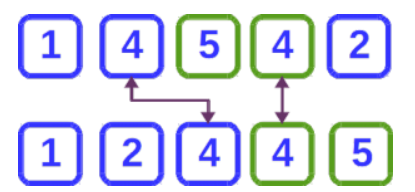

En este otro caso, en cambio, al ordenar es posible que el orden relativo se modifique quedando el 4 verde primero que el 4 azul. A esto se le llama algoritmo inestable.

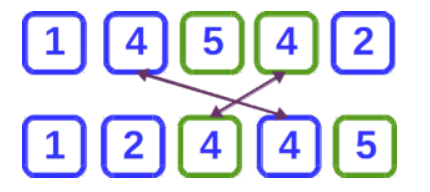

La estabilidad de el algoritmo de ordenamiento tendrá relevancia dependiendo de la naturaleza de la lista, en el caso de que la lista tenga una sola característica o que no existan elementos con la misma característica entonces el resultado de un algoritmo estable no variará que el de uno inestable.

https://juncotic.com/algoritmos-de-ordenamiento/

# **1. Algoritmo de ordenamiento Shell**

<h1>Complejidad del algoritmo Shell</h1>

*   Performance para el peor caso: $О(nlog_2^2n)$
*   Performance para el mejor caso: $O(nlogn)$
*   Complejidad: $O(n)$

El algoritmo Shell es una mejora de la ordenacion por inserción, donde se van comparando elementos distantes, al tiempo que se los intercambia si corresponde.A medida que se aumentan los pasos, el tamaño de los saltos disminuye, por esto mismo, es útil tanto como si los datos desordenados se encuentran cercanos, o lejanos.

Es bastante adecuado para ordenar listas de tamaño moderado, debido a que su velocidad es aceptable y su codificaion es bastante sencilla. Su velocidad depende de la secuencia de valores con los cuales trabaja, ordenándolos.El siguiente ejemplo muestra el proceso de forma grafica:

Por ejemplo, considere una lista de números como [13 14 94 33 82 25 59 94 65 23 45 27 73 25 39 10]. Si comenzamos con un tamaño de paso de 8, podríamos visualizar esto dividiendo la lista de números en una tabla con 5 columnas. Esto quedaría así:

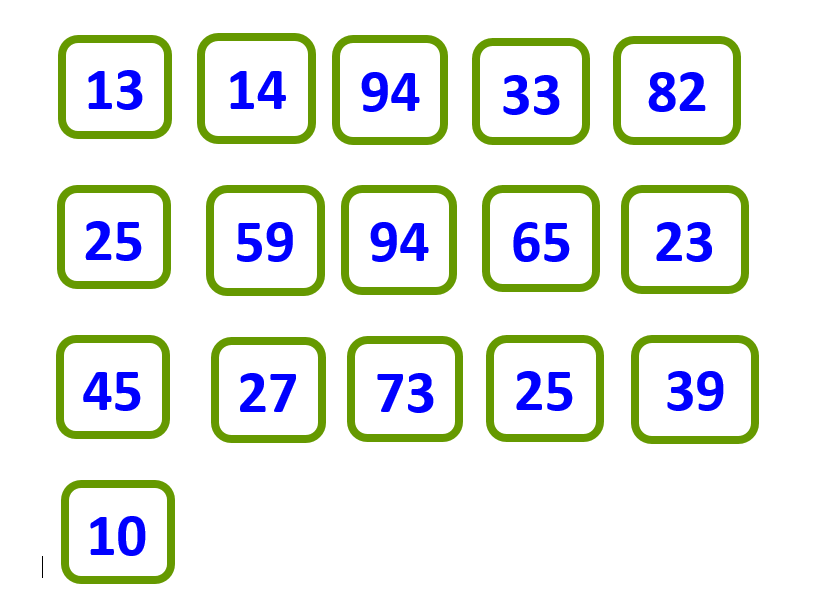

Entonces ordenamos cada columna, lo que nos queda:
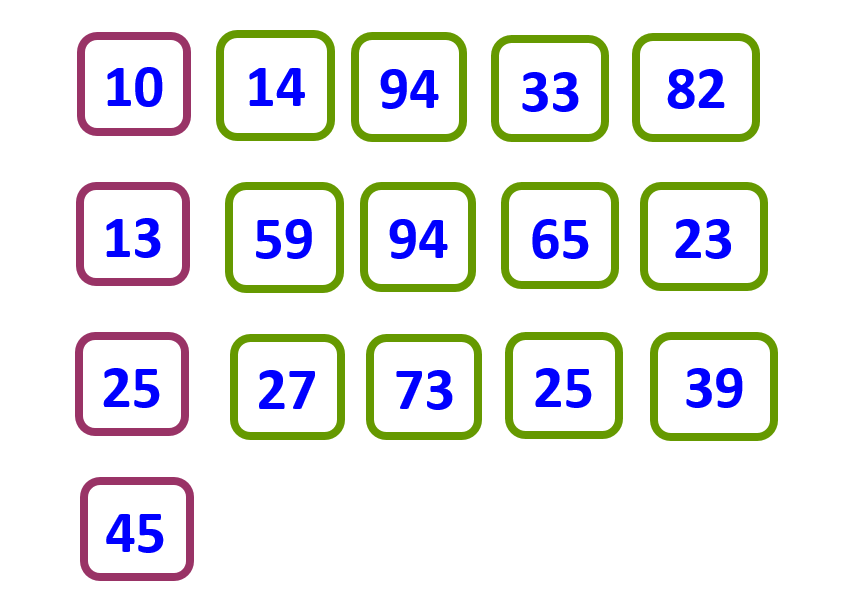


Cuando lo leemos de nuevo como una única lista de números, obtenemos [ 10 14 73 25 23 13 27 94 33 39 25 59 94 65 82 45 ]. Aquí, el 10 que estaba en el extremo final, se ha movido hasta el extremo inicial.

Esta lista es entonces de nuevo ordenada usando un ordenamiento con un espacio de 3 posiciones, y después un ordenamiento con un espacio de 1 posición (ordenamiento por inserción simple).

**SECUENCIA DE ESPACIOS**

La secuencia de espacios es una parte integral del algoritmo Shell sort. Cualquier secuencia incremental funcionaría siempre que el último elemento sea 1. El algoritmo comienza realizando un ordenamiento por inserción con espacio, siendo el espacio el primer número en la secuencia de espacios. Continua para realizar un ordenamiento por inserción con espacio para cada número en la secuencia, hasta que termina con un espacio de 1.

Cuando el espacio es 1, el ordenamiento por inserción con espacio es simplemente un ordenamiento por inserción ordinario, garantizando que la lista final estará ordenada. La secuencia de espacios que fue originalmente sugerida por Donald Shell debía comenzar con N / 2 y dividir por la mitad el número hasta alcanzar 1.

Aunque esta secuencia proporciona mejoras de rendimiento significativas sobre los algoritmos cuadráticos como el ordenamiento por inserción, se puede cambiar ligeramente para disminuir más el tiempo necesario medio y el del peor caso. Quizás la propiedad más crucial del Shell sort es que los elementos permanecen k-ordenados incluso mientras el espacio disminuye.

Se dice que un vector dividido en k subvectores esta k-ordenado si cada uno de esos subvectores esta ordenado en caso de considerarlo aislado. Por ejemplo, si una lista fue 5-ordenada y después 3-ordenada, la lista está ahora no sólo 3-ordenada, sino tanto 5-ordenada como 3-ordenada. Si esto no fuera cierto, el algoritmo desharía el trabajo que había hecho en iteraciones previas, y no conseguiría un tiempo de ejecución tan bajo.

fuiente:
https://www.ecured.cu/Algoritmo_de_Ordenamiento_Shell

In [ ]:
#Algoritmo de ordenamiento shell
code = """
//librerias necesarias
#include <stdio.h>
//libreria necesaria para la paralelizacion
#include <omp.h>
#include <stdlib.h> //DESCOMENTAR SI SE CIERRA LA VENTANA
#define N 100000 //Es una constante
#define TOPEF N //Es una constante

//modulo en el que se generan los elementos aleatorios del arreglo de forma paralela, tiene 2 argumentos el arreglo y la longitud
void CargarVectorDesordenadoParalelo(int *array, int Nro)
{
    //se generan variables
    double start;
    double end;
    start = omp_get_wtime();//devuelve el tiempo transcurrido hasta este pundo de ejecucion.

    printf("Cargando vector desordenado...\\n");
    int f;
    int n;

    //region paralela en la que se ingresan los elementos del arreglo por regiones del arreglo
    #pragma omp parallel   private(f)
    {
        //se paraleliza el bucle FOR para que cada hilo se encarge de ingresar los datos a un determinado rango del arreglo
        #pragma omp for
        for (f = 0; f < Nro; f++)
        {
            n = rand() % Nro + 1;
            array[f] = n;
        }
    }

    end = omp_get_wtime();//devuelve el tiempo transcurrido del reloj hasta este punto de ejecucion.
    printf("Tiempo de ejecucion %f seconds\\n", end - start);
}
 
//modulo de ordenamiento sort shell sin paralelizar, recibe 2 argumentos, el arreglo y la longitud 
void Shell(int *array, int n)
{
    
    //se generan variables
    double start;
    double end;
    start = omp_get_wtime();//devuelve el tiempo transcurrido hasta este pundo de ejecucion.
    //declaracion de variables necesarias
    int i,x,y,tmp;
    for(i = 1; i < n; i = i*3+1) {} //la idea es que SOLO se incremente i a razón de i*3+1 por repetición
    while (i > 0)
    {
        //en este realiza las comparaciones de cada elemento con otro que este "i" posiciones mas adelante
        for(x = i; x < n; x++)
        {
            y = x;
            tmp = array[x];
            while (y >= i && array[y - i] > tmp)
            {
                array[y] = array[y - i];
                y = y - i;
            }
            array[y] = tmp;
        }
        i = i / 2;
    }
    end = omp_get_wtime();//devuelve el tiempo transcurrido del reloj hasta este punto de ejecucion.
    printf("Tiempo de ejecucion %f segundos,Shell\\n", end - start);
}

// modulo de ordenamiento shell paralelizado, recibe 2 argumentos, el arrglo y la longitud
void ShellParalelo(int *v2,int n)
{
    //se generan variables
    double start;
    double end;
    start = omp_get_wtime();//devuelve el tiempo transcurrido hasta este pundo de ejecucion.
    //se declaran algunas variables necesarias
    int i = 0, j = 0, incrmnt = 0, temp = 0;
    int iPos;


    //printf("Realizando ordenamiento utilizando Shell PARALEO...");
    incrmnt = TOPEF / 2;

    //region paralela 
    //Con firstprivate mantengo el valor inicializado anteriormente de incrmnt
    #pragma omp parallel default(none) firstprivate(incrmnt) shared(v2) private(i, j, temp)
    {
        while (incrmnt > 0)
        {
            //paralelizacion del bucle FOR 
            #pragma omp for
            for (i = incrmnt; i < TOPEF; i++)
            {
                j = i;
                temp = v2[i];
                while ((j >= incrmnt) && (v2[j - incrmnt] > temp))
                {
                    v2[j] = v2[j - incrmnt];
                    j = j - incrmnt;
                }
                v2[j] = temp;
            }
            incrmnt /= 2;
        }
    }
    end = omp_get_wtime();//devuelve el tiempo transcurrido del reloj hasta este punto de ejecucion.
    printf("Tiempo de ejecucion %f segundos,ShellParalelo\\n", end - start);
}
 
 
 
// modulo de impresion con 3 argumentos (nombre de la funcion que ordeno el arreglo, el arreglo ordenado, la longitud del arreglo)
void Print(char *function,int *array, int n)
{
    //declaracion de un contador
    int x;

    //imprime el nombre de la funcion
    printf("%s:",function);

    //en el bucle imprime los elementos del arreglo ordenado
    for(x = 0; x < n; x++) 
    {
        printf(" %i",array[x]);
    }
    printf("\\n");
}

// modulo principal
int main() {
    srand(2);//Siempre usar la semilla antes de llamar la funcion CargarVectorDesordenado, para generar siempre los mismos numeros
    int vector[N] ; //creacion del vector
    CargarVectorDesordenadoParalelo(vector,N);//generacion de los elementos aleatorios y almacenarlos en el arreglo vector
 
    //se despliega el modulo shell sin paralelizar y se imprime el arreglo ordenado
    Shell(vector,N);
    Print("Shell",vector,N);
    
    //se despliega el modulo shell paralelizado y se imprime el arreglo ordenado 
    ShellParalelo(vector,N);
    Print("Shell Paralelo",vector,N);
 
    return 1;
}
"""
#algoritmo shell
text_file = open("code.c", "w")
text_file.write(code)
text_file.close()
#introducimos el numero maximo de hilos disponibles
%env OMP_NUM_THREADS=1000
!gcc -o algoritmoshell -fopenmp code.c
 
!./algoritmoshell

env: OMP_NUM_THREADS=1000
Cargando vector desordenado...
Tiempo de ejecucion 0.034752 seconds
Tiempo de ejecucion 0.031130 segundos,Shell
Shell: 1 2 4 5 6 7 7 8 8 10 12 12 13 14 21 21 23 23 24 26 28 29 32 33 35 36 39 40 41 42 46 47 51 52 52 53 54 54 55 56 57 57 59 60 62 65 66 66 67 69 71 72 72 72 73 76 76 78 81 82 83 84 84 87 87 89 91 94 95 98 99 100 102 103 103 105 105 105 107 108 110 110 113 115 119 119 121 122 123 123 125 125 125 126 127 130 132 136 136 137 137 137 138 139 140 140 141 141 143 144 145 145 146 147 147 147 147 149 150 150 150 150 154 154 155 156 156 157 157 160 163 165 165 168 168 169 169 170 170 170 170 171 171 171 171 172 173 177 177 177 181 181 181 184 184 185 185 185 186 188 188 189 189 189 191 193 194 195 199 201 202 202 203 205 205 205 207 208 210 211 211 211 213 213 213 214 215 216 216 216 216 217 219 221 221 221 222 222 223 223 224 225 228 231 231 233 235 237 238 238 240 242 243 244 244 244 249 250 250 250 251 253 253 254 255 256 257 258 259 261 261 262 262 262

# **2. Algoritmo de ordenamiento Burbuja**



<h1>Complejidad del algoritmo burbuja</h1>

*   Performance para el peor caso: $О(n^2)$
*   Performance para el mejor caso: $O(n)$
*   Complejidad: $O(n^2)$



El algoritmo de ordenamiento de burbuja es uno de los algoritmos de ordenamiento más sencillos aunque no es el más eficiente. Su simplicidad lo convierte en un algoritmo ideal para practicar programación.

- Comenzamos con una lista de elementos no ordenados


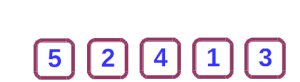

- Tomamos  los primeros dos números y si no están ordenados se intercambian los lugares

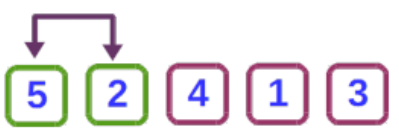

- Se repite el proceso con los siguientes dos números

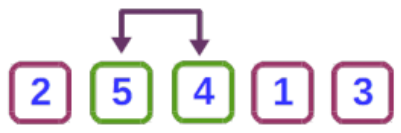

- El proceso continua hasta llegar al final

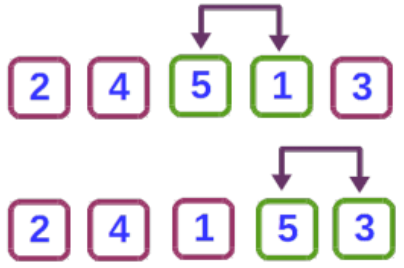

- El último número ya queda ordenado por lo que en la siguiente iteración ya no se evalúa acortando el proceso

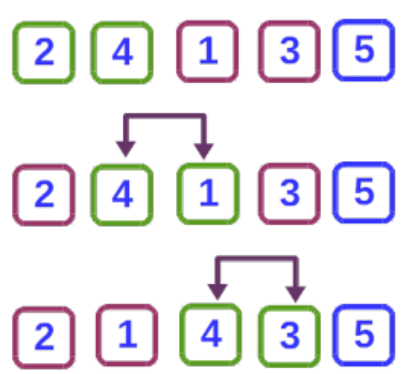

- En la tercera iteración no se evalúan los últimos dos valores

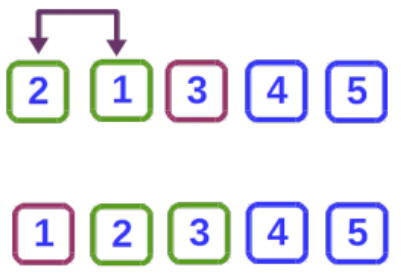

- La cuarta iteración se finaliza sin que se haya realizado un intercambio por lo que el algoritmo termina

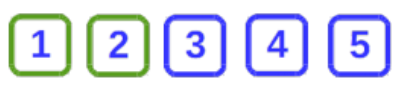

- Al finalizar el algoritmo tenemos como resultado la lista ordenado

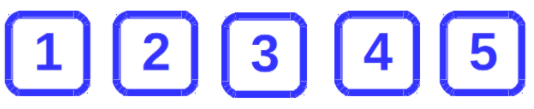

https://juncotic.com/ordenamiento-de-burbuja-algoritmos-de-ordenamiento/


In [ ]:
#Algoritmo burbuja
code = """
//Incluimos las librerias necesarias para la ejecucion del programa
#include <stdio.h>
//Libreria nesesaria para la paralelizacion
#include <omp.h>
#include <stdlib.h> //DESCOMENTAR SI SE CIERRA LA VENTANA
#define N 100 //Es una constante
#define TOPEF N //Es una constante

//Modulo en el cual vamos a generar los elementos aleatorios de la arreglo en forma paralela, contiene dos elemento el arreglo y la longitud
void CargarVectorDesordenadoParalelo(int *array, int Nro)
{
    //Generamos las variables
    double start;
    double end;
    start = omp_get_wtime();
	printf("\\nCargando vector desordenado...\\n");
	int f;
	int n;
    //Region paralela en la que se ingresan los elementos del arreglo por regiones
    #pragma omp parallel   private(f)
    {
        //Se paraleliza el bucle for para que cada hilo se encargue de ingresar los datos a un determinado rango del arreglo
        #pragma omp for
        for (f = 0; f < Nro; f++)
        {
            n = rand() % Nro + 1;
            array[f] = n;
        }
    }
    end = omp_get_wtime();
    printf("Tiempo de ejecucion %f seconds\\n", end - start);
	printf("Fin!\\n");
}

//Modulo de ordenamiento burbuja sin paralelizar
void Burbuja(int *array, int n)
{
    //Generamos las variables
    double start;
    double end;
    start = omp_get_wtime();
    int x,y,tmp;
    for(x = 1; x < n; x++)
    {
        //En esta parte realizamos la comparacion de un elemento con otro
        for(y = 0; y < n - x; y++)
        {
            if(array[y] > array[y + 1])
            {
                tmp = array[y];
                array[y] = array[y + 1];
                array[y + 1] = tmp;
            }
        }
    }
    end = omp_get_wtime();
    printf("Tiempo de ejecucion %f segundos,Burbuja\\n", end - start);
}
//Modulo de ordenamiento burbuja paralelizado
void BurbujaParalelo(int *v2, int n)
{
    //Generamos las variables
    double start;
    double end;
    start = omp_get_wtime();
	int i;
	int fase;
	int tmp;
	int iPos;
//Region paralela
	//printf("Realizando ordenamiento utilizando burbujeo PARALEO...\\n");
#pragma omp parallel default(none) shared(v2) private(i, tmp, fase)//Usando default fuerzo a decidir el scope de TODAS las variables
	for (fase = 0; fase < TOPEF; fase++)
	{
		if (fase % 2 == 0)
			#pragma omp for //SE COMENTA PORQUE CON 8 NUCLEOS TARDA MAS QUE EL LINEAL
			for (i = 1; i < TOPEF; i += 2)
			{
				if (v2[i - 1] > v2[i])
				{
					tmp = v2[i - 1];
					v2[i - 1] = v2[i];
					v2[i] = tmp;
				}
			}
		else
			#pragma omp for //SE COMENTA PORQUE CON 8 NUCLEOS TARDA MAS QUE EL LINEAL
			for (i = 1; i < TOPEF - 1; i += 2)
			{
				if (v2[i] > v2[i + 1])
				{
					tmp = v2[i + 1];
					v2[i + 1] = v2[i];
					v2[i] = tmp;
				}
			}
	}
	end = omp_get_wtime();
    printf("Tiempo de ejecucion %f segundos,BurbujaParalelo\\n", end - start);
	
}

void Print(char *function,int *array, int n)
{
    //Declaramos un contador
    int x;
    //Imprime el nombre de la funcion
    printf("%s:",function);
    //En el bucle se imprime los elementos del arreglo ordenado
    for(x = 0; x < n; x++) 
    {
        printf(" %i",array[x]);
    }
    printf("\\n");
}

//Modulo principal
int main() {
    srand(2);//Siempre usar la semilla antes de llamar la funcion CargarVectorDesordenado, para generar siempre los mismos numeros
    int vector[N] ;
    CargarVectorDesordenadoParalelo(vector,N);
    
    Burbuja(vector,N);
    Print("Burbuja",vector,N);
    
    BurbujaParalelo(vector,N);
    Print("BurbujaParalelo",vector,N);

    return 1;
}
"""

text_file = open("code.c", "w")
text_file.write(code)
text_file.close()
%env OMP_NUM_THREADS=1000
!gcc -o algoritmoburbuja -fopenmp code.c

!./algoritmoburbuja

env: OMP_NUM_THREADS=1000

Cargando vector desordenado...
Tiempo de ejecucion 0.030622 seconds
Fin!
Tiempo de ejecucion 0.000037 segundos,Burbuja
Burbuja: 2 3 3 4 5 6 7 10 11 11 14 15 16 17 18 18 18 20 22 24 24 28 29 31 31 34 38 38 38 43 44 44 45 46 46 46 49 50 50 50 50 52 53 55 56 57 57 58 58 61 61 61 61 62 62 63 63 63 64 65 66 66 66 67 67 68 68 68 69 70 70 71 73 74 74 76 76 78 78 80 82 83 85 86 87 87 87 89 91 91 91 92 94 97 97 97 98 99 100 100
Tiempo de ejecucion 0.314613 segundos,BurbujaParalelo
BurbujaParalelo: 2 3 3 4 5 6 7 10 11 11 14 15 16 17 18 18 18 20 22 24 24 28 29 31 31 34 38 38 38 43 44 44 45 46 46 46 49 50 50 50 50 52 53 55 56 57 57 58 58 61 61 61 61 62 62 63 63 63 64 65 66 66 66 67 67 68 68 68 69 70 70 71 73 74 74 76 76 78 78 80 82 83 85 86 87 87 87 89 91 91 91 92 94 97 97 97 98 99 100 100


# **3. Ordenamiento de burbuja bidireccional**

<h1>Complejidad del algoritmo burbuja bidireccional</h1>

*   Performance para el peor caso: $О(n^2)$
*   Performance para el mejor caso: $O(n)$
*   Complejidad: $O(n^2)$

El ordenamiento de burbuja bidireccional (cocktail sort en inglés) es un algoritmo de ordenamiento que surge como una mejora del algoritmo ordenamiento de burbuja.
La manera de trabajar de este algoritmo es ir ordenando al mismo tiempo por los dos extremos del vector. De manera que tras la primera iteración, tanto el menor como el mayor elemento estarán en sus posiciones finales. De esta manera se reduce el número de comparaciones aunque la complejidad del algoritmo sigue siendo O(n²).
Hacemos un recorrido ascendente (del primer elemento al último), cogemos el primer elemento y lo comparamos con el siguiente, si el siguiente es menor lo pasamos al puesto anterior, de esta forma al final de la lista nos queda el mayor. Una vez terminada la serie ascendente, hacemos un recorrido descendente (del último elemento al primero) pero esta vez nos quedamos con los menores a los que vamos adelantando posiciones en vez de retrasarlas como hicimos en la serie ascendente. Repetimos las series alternativamente pero reduciendo el ámbito en sus extremos pues ya tendremos allí los valores más bajos y más altos de la lista, hasta que no queden elementos en la serie; en el pseudocódigo de ejemplo: Hasta (izq > der).

Comenzamos con una lista de elementos no ordenados


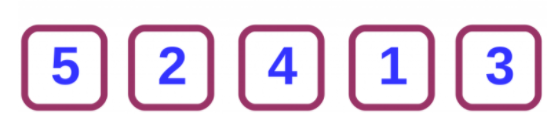

Tomamos  los primeros dos números y si no están ordenados se intercambian los lugares

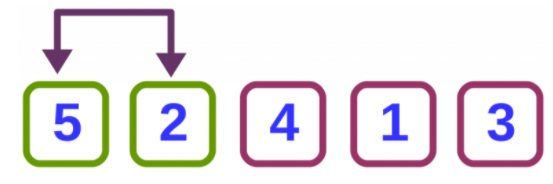

Se mueve un espacio hacia la derecha y se repite el proceso.

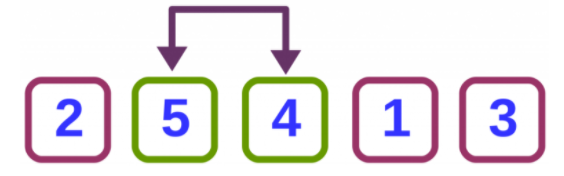

El proceso continua hasta llegar al final de la lista.

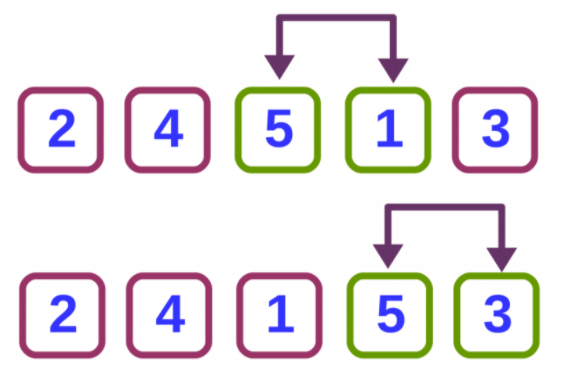

Al llegar al final a diferencia del ordenamiento de burbuja se repite el proceso en sentido inverso comenzando por el final de la lista hasta llegar al inicio.

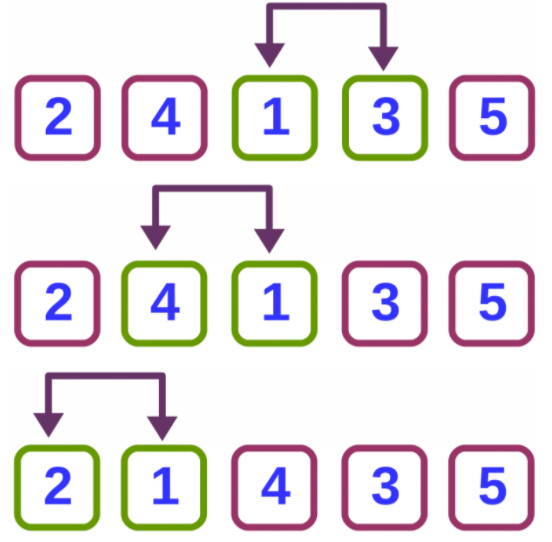

Al terminar el proceso el último número y el primero ya quedan ordenados por lo que en la siguiente iteración ya no se evalúan acortando el proceso.

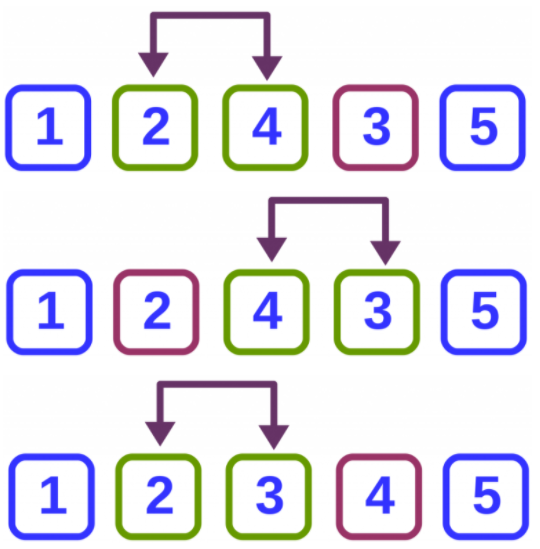

Al finalizar la segunda iteración se marcan como ordenados el primer y último número comparado.

No es posible realizar más iteraciones ya que no quedan dos números sin ordenar para comparar, por lo tanto el algoritmo termina.

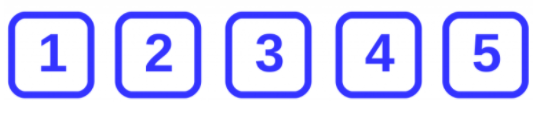

https://juncotic.com/ordenamiento-de-burbuja-bidireccional-algoritmos-de-ordenamiento/

In [ ]:
#Algoritmo Insercion
code = """
//librerias
#include <stdio.h>
#include <omp.h>
#include <stdlib.h> //DESCOMENTAR SI SE CIERRA LA VENTANA
#define N 1000 //Es una constante
#define TOPEF N //Es una constante

void CargarVectorDesordenadoParalelo(int *array, int Nro)
{
    double start;//variables del tiempo
    double end;
    start = omp_get_wtime();
	printf("\\nCargando vector desordenado...\\n");
	int f;
	int n;
    #pragma omp parallel   private(f)
    {
        #pragma omp for
        for (f = 0; f < Nro; f++)
        {
            n = rand() % Nro + 1;
            array[f] = n;
        }
    }
    end = omp_get_wtime();
    printf("Tiempo de ejecucion %f seconds\\n", end - start);
}


void BurbujeoBidireccional(int *v2, int n)
{
	double start;//variables del tiempo
    double end;
    start = omp_get_wtime();
	register int a;
	int exchange;
	int t;
	do
	{//recorremos de derecha a izquierda decrementamos
		exchange = 0;
		for (a = TOPEF - 1; a > 0; --a)
		{
			if (v2[a - 1] > v2[a])
			{
				t = v2[a - 1];
				v2[a - 1] = v2[a];
				v2[a] = t;
				exchange = 1;
			}
		}
		for (a = 1; a < TOPEF; ++a)
		{
			if (v2[a - 1] > v2[a])
			{
				t = v2[a - 1];
				v2[a - 1] = v2[a];
				v2[a] = t;
				exchange = 1;
			}
		}
	} while (exchange);//mientras haya cambios
	
	end = omp_get_wtime();
    printf("Tiempo de ejecucion %f segundos BurbujeoBidireccional,\\n", end - start);
}

void BurbujeoBidireccionalParalelo(int *v2, int n)
{
	double start;//variables del tiempo
    double end;
    start = omp_get_wtime();
	register int a;
	int exchange;
	int t = 0;
	long iPos;
	//printf("Realizando ordenamiento utilizando burbujeo bidireccional PARALELO...\\n");
    #pragma omp parallel default(none) shared(v2) private(a, t, exchange)
	do
	{
		exchange = 0;
		#pragma omp for //SE CUELGA CON 8 NUCLEOS, PERO CON 2 FUNCIONA
		for (a = TOPEF - 1; a > 0; --a)
		{
			if (v2[a - 1] > v2[a])
			{
				t = v2[a - 1];
				v2[a - 1] = v2[a];
				v2[a] = t;
				exchange = 1;
			}
		}
		#pragma omp for //SE CUELGA CON 8 NUCLEOS, PERO CON 2 FUNCIONA
		for (a = 1; a < TOPEF; ++a)
		{
			if (v2[a - 1] > v2[a])
			{
				t = v2[a - 1];
				v2[a - 1] = v2[a];
				v2[a] = t;
				exchange = 1;
			}
		}
	} while (exchange);
	end = omp_get_wtime();
    printf("Tiempo de ejecucion %f segundos BurbujeoBidireccionalParalelo,\\n", end - start);
}



void Print(char *function,int *array, int n)
{
    int x;
    printf("%s:",function);
    for(x = 0; x < n; x++) 
    {
        printf(" %i",array[x]);
    }
    printf("\\n");
}


int main() {
    srand(2);//Siempre usar la semilla antes de llamar la funcion CargarVectorDesordenado, para generar siempre los mismos numeros
    int vector[N] ;
    CargarVectorDesordenadoParalelo(vector,N);

    BurbujeoBidireccional(vector,N);
    Print("BurbujeoBidireccional",vector,N);
    
    BurbujeoBidireccionalParalelo(vector,N);
    Print("BurbujeoBidireccionalParalelo",vector,N);

    return 1;
}
"""

text_file = open("code.c", "w")
text_file.write(code)
text_file.close()
%env OMP_NUM_THREADS=1000
!gcc -o algoritmoburbugeobidireccional -fopenmp code.c

!./algoritmoburbugeobidireccional

env: OMP_NUM_THREADS=1000

Cargando vector desordenado...
Tiempo de ejecucion 0.026185 seconds
Tiempo de ejecucion 0.002028 segundos BurbujeoBidireccional,
BurbujeoBidireccional: 2 3 3 5 6 8 9 10 10 11 12 12 14 15 16 17 17 18 19 19 19 20 20 20 27 28 29 29 30 30 30 32 32 32 34 35 35 38 38 41 42 42 42 43 46 46 47 47 50 51 51 53 53 53 54 56 57 58 58 60 62 64 66 68 69 69 69 69 71 72 74 76 77 77 78 78 79 79 79 79 80 81 81 82 82 82 84 84 84 86 86 88 89 89 91 92 94 94 94 95 96 96 96 97 98 98 100 102 102 104 105 106 107 107 107 107 108 108 109 111 113 115 117 119 120 120 120 121 122 122 124 124 125 125 126 128 131 132 133 134 134 134 141 142 142 143 143 144 144 146 146 146 146 148 148 149 150 150 151 151 151 152 153 155 156 157 157 158 158 159 159 160 162 162 165 166 168 168 169 170 173 173 175 175 176 176 177 179 179 180 180 183 185 186 186 187 190 190 191 193 194 196 196 197 197 198 199 200 202 205 205 206 209 210 211 211 211 212 216 217 217 217 218 219 221 223 225 225 226 230 231 231 232 23

# **4. Algoritmo de ordenamiento insercion**




<h1>Complejidad del algoritmo burbuja bidireccional</h1>

*   Performance para el peor caso: $О(n^2)$
*   Performance para el mejor caso: $O(n)$
*   Complejidad: $O(n^2)$

El algoritmo de ordenamiento por inserción es un algoritmo de fácil aplicación que permite el ordenamiento de una lista.

Su funcionamiento consiste en el recorrido por la lista seleccionando en cada iteración un valor como clave y compararlo con el resto insertándolo en el lugar correspondiente.

- Comenzamos con una lista de elementos no ordenados

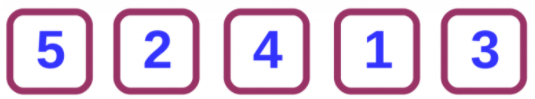

- Se selecciona el segundo valor como clave y se lo compara con los valores ubicados a su izquierda. Si el valor es menor entonces se inserta en el lugar correspondiente.

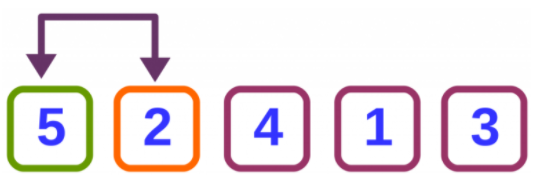

- Se selecciona el siguiente número como clave y se repite el proceso para todos los valores anteriores. En el siguiente caso la clave 4 se compara primero con 5 y luego con 2. Al ser menor que el primer caso comparado y mayor que el segundo se lo inserta entre ambos números.

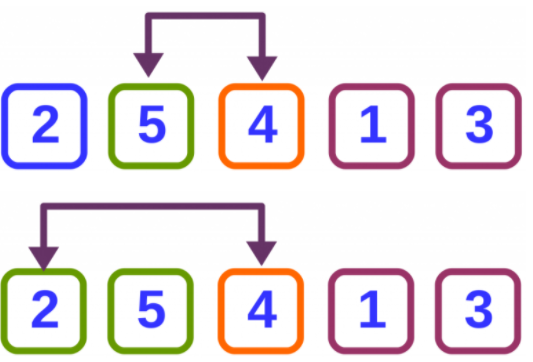

- Se selecciona la siguiente clave. Se sigue comparando con cada número a su izquierda hasta encontrar uno que sea menor o llegar al principio de la lista.

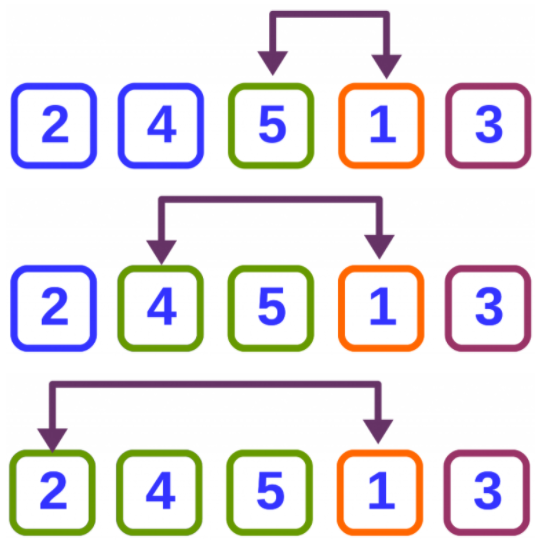

- Finalmente se selecciona la última clave.

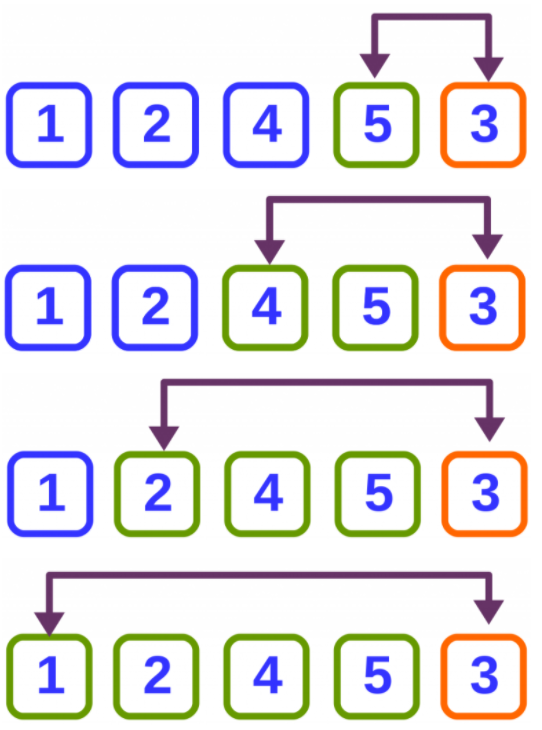

- Al finalizar el algoritmo tenemos como resultado la lista ordenada.

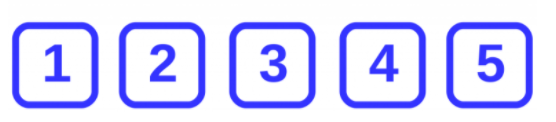

https://juncotic.com/ordenamiento-por-insercion-algoritmos-de-ordenamiento/

In [ ]:
#Algoritmo Insercion
code = """
//librerias
#include <stdio.h>
#include <omp.h>
#include <stdlib.h> //DESCOMENTAR SI SE CIERRA LA VENTANA
#define N 1000 //Es una constante
#define TOPEF N //Es una constante

//Modulo en el cual generaremos los elementos aleatorios de la arreglo en forma paralela, contiene dos elemento el arreglo y la longitud
void CargarVectorDesordenadoParalelo(int *array, int Nro)
{
    double start;//variables del tiempo
    double end;
    start = omp_get_wtime();
	printf("\\nCargando vector desordenado...\\n");
	int f;
	int n;
	  //Region paralela en la que se ingresan los elementos del arreglo por regiones
    #pragma omp parallel   private(f)
    { 
			  //Se paraleliza el bucle for para que cada hilo se encargue de ingresar los datos a un determinado rango del arreglo
        #pragma omp for
        for (f = 0; f < Nro; f++)
        {
            n = rand() % Nro + 1;
            array[f] = n;
        }
    }
    end = omp_get_wtime();
    printf("Tiempo de ejecucion %f seconds\\n", end - start);
	printf("Fin!\\n");
}

//Modulo de ordenamiento Insercion sin paralelizar
void InsertionSort(int *v2, int n)
{
	double start;//variables del tiempo
    double end;
    start = omp_get_wtime();//guardamos el tiempo de inicio
	int i, j, index;
	//iniciamos el bucle for
	for (i = 1; i < TOPEF; i++)
	{
		index = v2[i];
		j = i;
		while ((j > 0) && (v2[j - 1] > index))
		{
			v2[j] = v2[j - 1];
			j = j - 1;
		}
		v2[j] = index;
	}
	end = omp_get_wtime();//capturamos el tiempo de finalizacion
    printf("Tiempo de ejecucion %f segundos, InsertionSort\\n", end - start);//mostramos el resultado obtenido
}
//Modulo de ordenamiento Insercion paralelizado
void InsertionSortParalelo(int *v2, int n)
{
	double start;//variables del tiempo
    double end;
    start = omp_get_wtime();
	int i, j, index;
	long iPos;

	//printf("Realizando ordenamiento utilizando InsertionSort PARALELO...");
	//region paralela
    #pragma omp parallel for default(none) shared(v2) private(i, j, index)
	for (i = 1; i < TOPEF; i++)
	{
		index = v2[i];
		j = i;
		while ((j > 0) && (v2[j - 1] > index))
		{
			v2[j] = v2[j - 1];
			j = j - 1;
		}
		v2[j] = index;
	}
	end = omp_get_wtime();
    printf("Tiempo de ejecucion %f segundos, InsertionSort\\n", end - start);
}

//modulo imprimir
void Print(char *function,int *array, int n)
{
	  //declaramos contador
    int x;
		//Imprime el nombre de la funcion
    printf("%s:",function);
		//En el bucle se imprime los elementos del arreglo ordenado
    for(x = 0; x < n; x++) 
    {
        printf(" %i",array[x]);
    }
    printf("\\n");
}

//menu principal
int main() {
    srand(2);//Siempre usar la semilla antes de llamar la funcion CargarVectorDesordenado, para generar siempre los mismos numeros
    int vector[N] ;
    CargarVectorDesordenadoParalelo(vector,N);

    InsertionSort(vector,N);
    Print("InsertionSort",vector,N);
    
    InsertionSortParalelo(vector,N);
    Print("InsertionSortParalelo",vector,N);

    return 1;
}
"""

text_file = open("code.c", "w")
text_file.write(code)
text_file.close()
%env OMP_NUM_THREADS=1000
!gcc -o algoritmoinsercion -fopenmp code.c

!./algoritmoinsercion

env: OMP_NUM_THREADS=1000

Cargando vector desordenado...
Tiempo de ejecucion 0.028214 seconds
Fin!
Tiempo de ejecucion 0.000947 segundos, InsertionSort
InsertionSort: 2 3 3 5 6 8 9 10 10 11 12 12 14 15 16 17 17 18 19 19 19 20 20 20 27 28 29 29 30 30 30 32 32 32 34 35 35 38 38 41 42 42 42 43 46 46 47 47 50 51 51 53 53 53 54 56 57 58 58 60 62 64 66 68 69 69 69 69 71 72 74 76 77 77 78 78 79 79 79 79 80 81 81 82 82 82 84 84 84 86 86 88 89 89 91 92 94 94 94 95 96 96 96 97 98 98 100 102 102 104 105 106 107 107 107 107 108 108 109 111 113 115 117 119 120 120 120 121 122 122 124 124 125 125 126 128 131 132 133 134 134 134 141 142 142 143 143 144 144 146 146 146 146 148 148 149 150 150 151 151 151 152 153 155 156 157 157 158 158 159 159 160 162 162 165 166 168 168 169 170 173 173 175 175 176 176 177 179 179 180 180 183 185 186 186 187 190 190 191 193 194 196 196 197 197 198 199 200 202 205 205 206 209 210 211 211 211 212 216 217 217 217 218 219 221 223 225 225 226 230 231 231 232 233 234 235 2

# **Conclusiones**

Si debemos considerar el rendimiento del programa como un todo, independientemente de cada algoritmo de ordenamiento por separado, usar cada algoritmo tiene sus ventajas y sus desventajas, hemos visto con ejemplos prcticos que paralelizar no siempre resuelve todos los problemas en cuanto a tiempo de ejecucion, y que un algoritmo secuencial en ocasiones consume mucho menos memoria y el esfuerzo de sincronizar los hilos por parte de la computadira se hace notar

# Creditos:

https://github.com/mcupo/OrdenamientoParaleloOpenMP